In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier as KNN

# Loading the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Replace 'Male' with 1 and 'Female' with 0 in the 'Gender' column for logistic regression
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Separating features and target variable
X = data.iloc[:, :4].values  # Considering 'Age' and 'EstimatedSalary' as features
y = data.iloc[:, 4].values

# Splitting the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
# Implement Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Update weights and bias using gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Initialize logistic regression model (Scratch)
log_reg_scratch = LogisticRegressionScratch()

# Training and testing using raw data (Scratch)
log_reg_scratch.fit(X_train, y_train)
y_pred_raw_scratch = log_reg_scratch.predict(X_test)
accuracy_raw_scratch = evaluate_model(y_test, y_pred_raw_scratch)
print("Accuracy using raw data (Scratch):", accuracy_raw_scratch)

# Normalization (Scratch)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

log_reg_scratch.fit(X_train_normalized, y_train)
y_pred_normalized_scratch = log_reg_scratch.predict(X_test_normalized)
accuracy_normalized_scratch = evaluate_model(y_test, y_pred_normalized_scratch)
print("Accuracy using normalized data (Scratch):", accuracy_normalized_scratch)

# Standardization (Scratch)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

log_reg_scratch.fit(X_train_standardized, y_train)
y_pred_standardized_scratch = log_reg_scratch.predict(X_test_standardized)
accuracy_standardized_scratch = evaluate_model(y_test, y_pred_standardized_scratch)
print("Accuracy using standardized data (Scratch):", accuracy_standardized_scratch)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\367185553.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy using raw data (Scratch): 0.6
Accuracy using normalized data (Scratch): 0.6
Accuracy using standardized data (Scratch): 0.8166666666666667


In [4]:
# Initialize logistic regression model (scikit-learn)
log_reg_sklearn = LogisticRegression()

# Training and testing using raw data (scikit-learn)
log_reg_sklearn.fit(X_train, y_train)
y_pred_raw_sklearn = log_reg_sklearn.predict(X_test)
accuracy_raw_sklearn = evaluate_model(y_test, y_pred_raw_sklearn)
print("\nAccuracy using raw data (scikit-learn):", accuracy_raw_sklearn)

# Normalization (scikit-learn)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

log_reg_sklearn.fit(X_train_normalized, y_train)
y_pred_normalized_sklearn = log_reg_sklearn.predict(X_test_normalized)
accuracy_normalized_sklearn = evaluate_model(y_test, y_pred_normalized_sklearn)
print("Accuracy using normalized data (scikit-learn):", accuracy_normalized_sklearn)

# Standardization (scikit-learn)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

log_reg_sklearn.fit(X_train_standardized, y_train)
y_pred_standardized_sklearn = log_reg_sklearn.predict(X_test_standardized)
accuracy_standardized_sklearn = evaluate_model(y_test, y_pred_standardized_sklearn)
print("Accuracy using standardized data (scikit-learn):", accuracy_standardized_sklearn)


Accuracy using raw data (scikit-learn): 0.6916666666666667
Accuracy using normalized data (scikit-learn): 0.7916666666666666
Accuracy using standardized data (scikit-learn): 0.8083333333333333


In [5]:
df= pd.read_csv('iris.csv')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['Species']=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [8]:
# Separating features and target variable
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1, test_size=0.3)

In [10]:
def Elbow(train_x,test_x,train_y,test_y):
    # Initiating an list to store accuracy values
    accuracy = np.zeros(20)
   
    # Training model for every value of K
    for i in range(1,21):
        clf = KNN(n_neighbors=i)
        clf.fit(train_x, train_y)
        
        # Making predictions on the test set
        predict_y = clf.predict(test_x)
        accuracy[i-1] = accuracy_score(test_y,predict_y)
    
    return accuracy

accuracy = Elbow(train_x,test_x,train_y,test_y)

In [11]:
k=range(1,21)

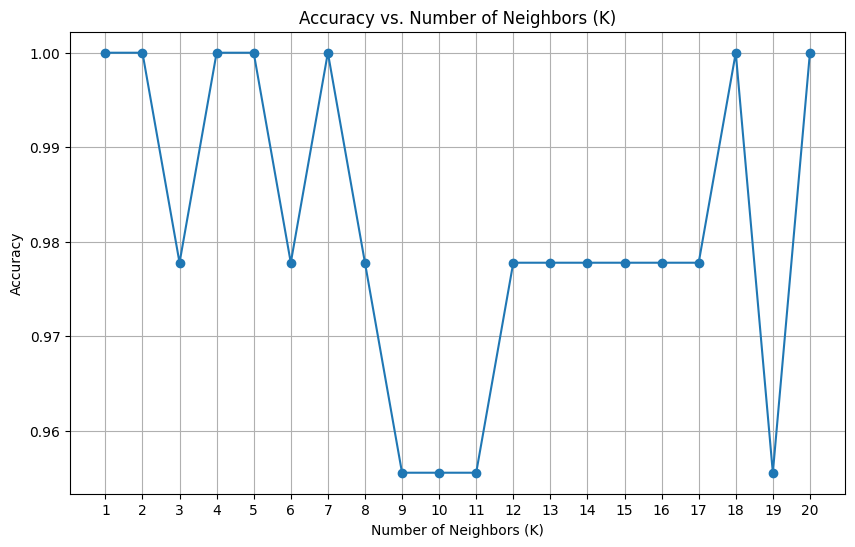

In [12]:
# Plotting the accuracy vs. k graph
plt.figure(figsize=(10, 6))
plt.plot(k, accuracy, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k)
plt.grid(True)
plt.show()

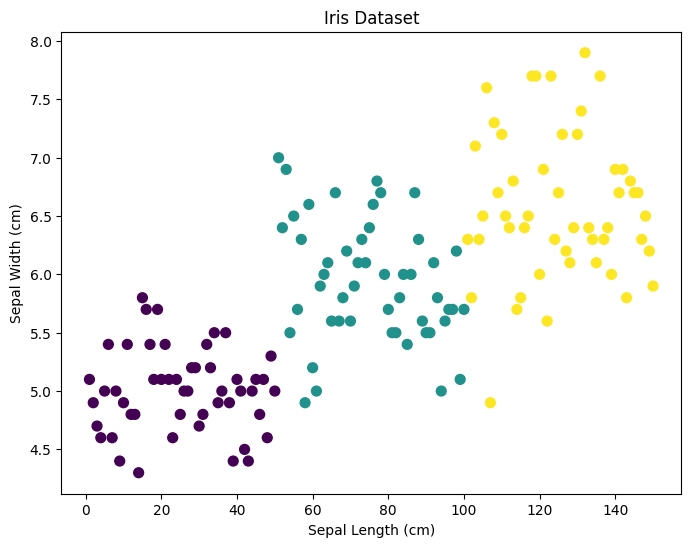

In [13]:
# Plotting the Iris dataset
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', s=50)
plt.title('Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()